In [2]:
 import pandas as pd

# Read the dataset
df = pd.read_csv('credit.csv')

# Explore the dataset
print(df.head())
print(df.info())

# Handle missing values
df.dropna(inplace=True)

# Handle outliers (if needed)
# ...

# Handle inconsistencies (if needed)
# ...

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)


  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67     

In [3]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Read the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Identify columns with numerical values where you want to handle outliers
numerical_columns = ['amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count']

# Winsorize the identified numerical columns
for column in numerical_columns:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])

# Save the winsorized data
df.to_csv('winsorized_data.csv', index=False)


In [9]:
# Print column names to check for issues
print("Column Names:", df.columns)

Column Names: Index(['amount', 'percent_of_income', 'years_at_residence', 'age',
       'existing_loans_count', 'dependents', 'default',
       'checking_balance_< 0 DM', 'checking_balance_> 200 DM',
       'checking_balance_unknown', 'credit_history_good',
       'credit_history_perfect', 'credit_history_poor',
       'credit_history_very good', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'employment_duration_4 - 7 years',
       'employment_duration_< 1 year', 'employment_duration_> 7 years',
       'employment_duration_unemployed', 'other_credit_none',
       'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled',
       'job_unemployed', 'job_unskilled', 'phone_yes', 'income_per_year',
       'age_category'],
      dtype='object')


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the winsorized data
df = pd.read_csv('winsorized_data.csv')

# Example Data Manipulation and Wrangling
# Feel free to customize this based on your analysis needs

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone'], drop_first=True)

# Feature scaling (if needed)
scaler = StandardScaler()
numerical_columns = ['amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Create new features or engineer existing ones
df['income_per_year'] = df['percent_of_income'] * 12
df['age_category'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Drop unnecessary columns (if needed)
columns_to_drop = ['months_loan_duration']  # Add more if necessary
df = df.drop(columns=columns_to_drop)

# Save the manipulated and wrangled data
df.to_csv('manipulated_data.csv', index=False)



C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


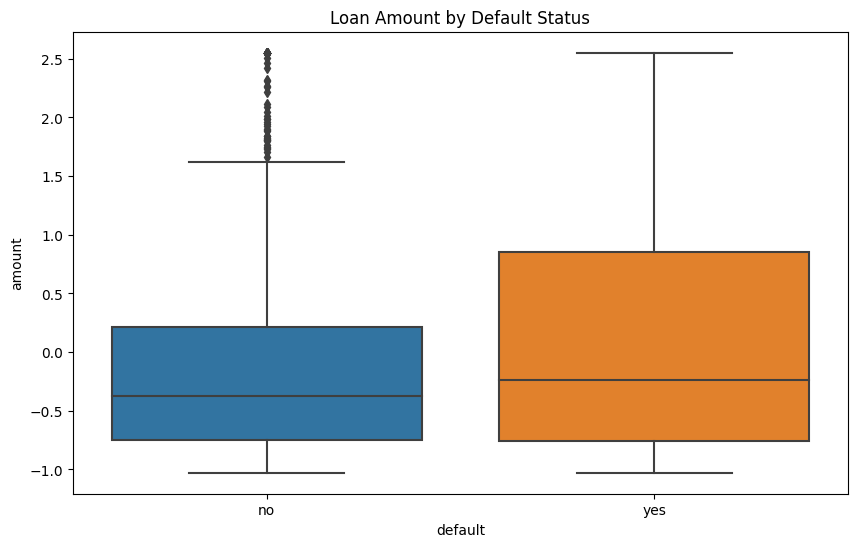

C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

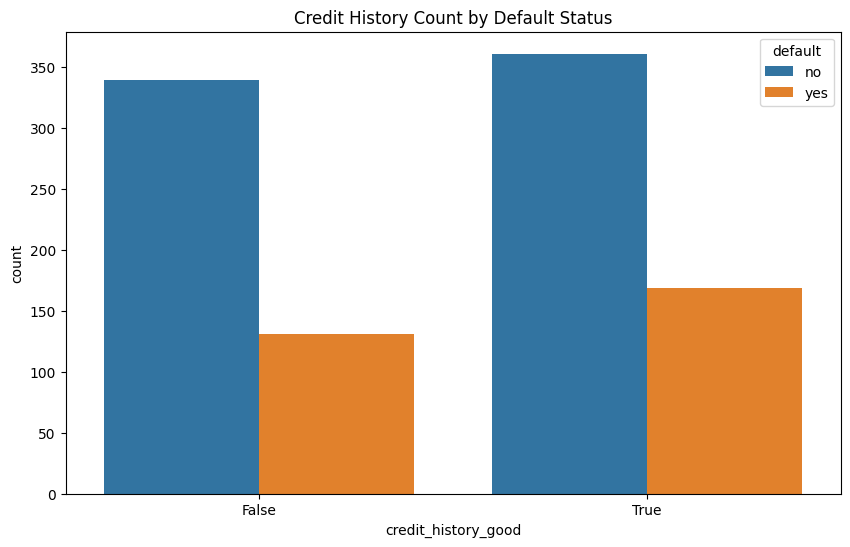

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the manipulated data
df = pd.read_csv('manipulated_data.csv')

# Ensure the 'visualizations/' directory exists
output_dir = 'visualizations/'
os.makedirs(output_dir, exist_ok=True)

# Pairplot for numerical variables
sns.pairplot(df, hue='default', diag_kind='kde')
plt.savefig(os.path.join(output_dir, 'pairplot.png'))
plt.show()

# Boxplot for 'amount' by 'default'
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='amount', data=df)
plt.title('Loan Amount by Default Status')
plt.savefig(os.path.join(output_dir, 'boxplot_amount_default.png'))
plt.show()

# Countplot for 'credit_history'
# Countplot for 'credit_history'
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_history_good', hue='default', data=df)
plt.title('Credit History Count by Default Status')
plt.savefig(os.path.join(output_dir, 'countplot_credit_history_default.png'))
plt.show()



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Load the manipulated data
df = pd.read_csv('manipulated_data.csv')

# Separate features (X) and target variable (y)
X = df.drop('default', axis=1)
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like median, most_frequent
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

# Predictions
predictions = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)



C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

          no       0.81      0.92      0.86       141
         yes       0.72      0.47      0.57        59

    accuracy                           0.79       200
   macro avg       0.76      0.70      0.72       200
weighted avg       0.78      0.79      0.78       200



C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\mages\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a